<a href="https://colab.research.google.com/github/shravanisorte2003/Machine-Learning-Models/blob/main/Building_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
class Linear_Regression():
  #initiating the parameters
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
    #no. of training ex. and no. of features
    self.m,self.n=X.shape #no. of rows and columns
    #initiating the weight and bias
    #y=0(x)+0
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    #implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self ):
    Y_prediction=self.predict(self.X)
    #calculate the gradients
    dw=-(2*(self.X.T).dot(self.Y - Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m

    #updateing the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self, X):
    return X.dot(self.w)+self.b #y=wx+b

using linear regression model for prediction

In [3]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data pre processing

In [4]:
#loading the data from csv file to a pandas dataframe
salary_data=pd.read_csv('/content/salary_data.csv')

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
#number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [8]:
#checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

splitting the features and the target

In [9]:
X=salary_data.iloc[:,:-1].values
#feautures in x and target in y #[1:10:1] in total we have 10 col from 1 to 10 having step size 1
Y=salary_data.iloc[:,1].values

In [10]:
print(X) #year of experienced values

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(Y) #salary values

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


splitting dataset into training and test data

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

training the linear regression model

In [13]:
model=Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [14]:
model.fit(X_train,Y_train)

In [15]:
#printing the parameters values (weight and bias)
print('weight= ',model.w[0])
print('bias= ',model.b)

weight=  9514.400999035135
bias=  23697.406507136307


y=9514 (x)+23697  --->
salary=9514(experience)+23697

predict the salary for test data

In [16]:
test_data_prediction=model.predict(X_test)

prediction of values is called regression

In [17]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values and actual values

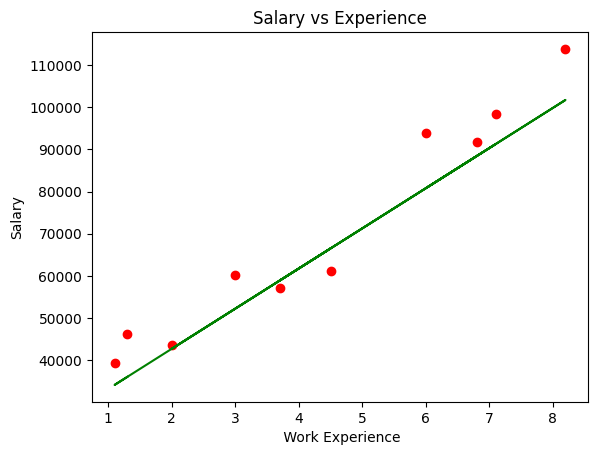

In [18]:
plt.scatter(X_test, Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='green')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()